In [2]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [3]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=';')
#visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
#explorar dados categoricos
#aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

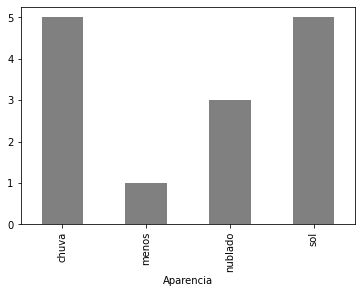

In [5]:
agrupado.plot.bar(color = 'gray')

In [6]:
#vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<AxesSubplot:xlabel='Vento'>

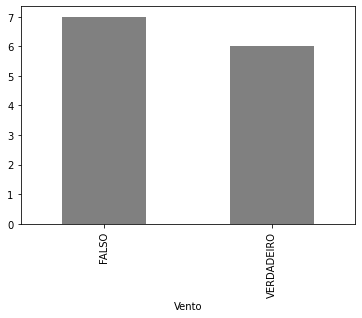

In [7]:
agrupado.plot.bar(color = 'gray')

In [8]:
#jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:xlabel='Jogar'>

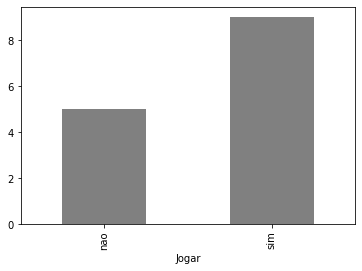

In [9]:
agrupado.plot.bar(color = 'gray')

In [10]:
#explorar colunas numericas
#temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

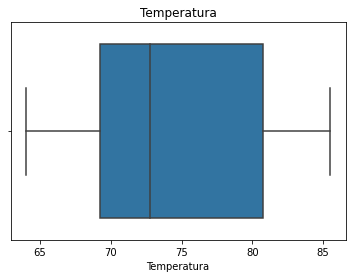

In [37]:
srn.boxplot(data=dataset,x='Temperatura').set_title('Temperatura')

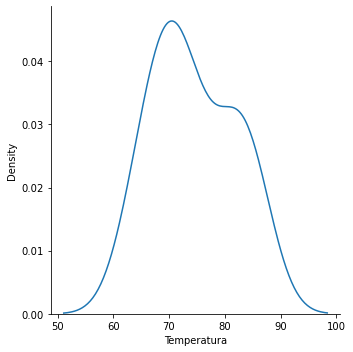

In [40]:
srn.displot(data=dataset,x="Temperatura", kind='kde')

In [13]:
#umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

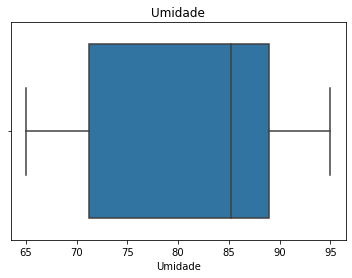

In [41]:
srn.boxplot(data=dataset, x='Umidade').set_title('Umidade')

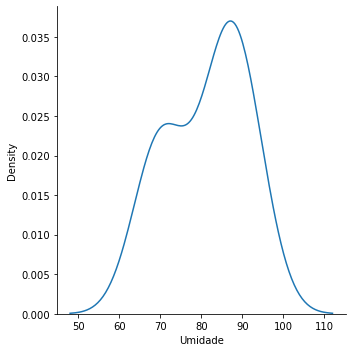

In [46]:
srn.displot(data=dataset,x='Umidade', kind='kde')

In [16]:
#contamos valores NAN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [17]:
#aparencia valor invalido
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [18]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "Sol"
dataset.loc[dataset['Aparencia'] == 'sol', 'Aparencia'] = "Sol"
#visualiza o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
Sol        6
chuva      5
nublado    3
dtype: int64

In [19]:
#temperatura fora do dominio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [20]:
#visualizar
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] >130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,Sol,1220,95.0,FALSO,nao


In [21]:
#calcular a mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [22]:
#substituir
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

In [23]:
#verificamos se ainda existem temperaturas fora do dominio
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [24]:
#umidade, dominio e NAs
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [25]:
#total de Nas
dataset['Umidade'].isnull().sum()

1

In [26]:
#calcular a mediana
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [27]:
#preenche NAs
dataset['Umidade'].fillna(mediana, inplace=True)

In [28]:
dataset['Umidade'].isnull().sum()

0

In [29]:
#visualiza de acordo com o dominio
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [30]:
#atualiza com mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)] = mediana

In [31]:
#visualiza novamente
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade']> 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [32]:
#ventos
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
85.5          1
FALSO         7
VERDADEIRO    6
dtype: int64

In [33]:
#total de Nas
dataset['Vento'].isnull().sum()

0

In [34]:
#preenche NAs
dataset['Vento'].fillna('FALSO',inplace=True)

In [35]:
#total de Nas
dataset['Vento'].isnull().sum()

0

In [36]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,Sol,85.0,85.0,FALSO,nao
1,Sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
